In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [75]:
df = pd.read_csv("D:\Data scientist\Dataset\heart-disease-uci\heart.csv")

In [76]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [78]:
df.isnull().sum()
df.isnull().values.any()

False

In [79]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


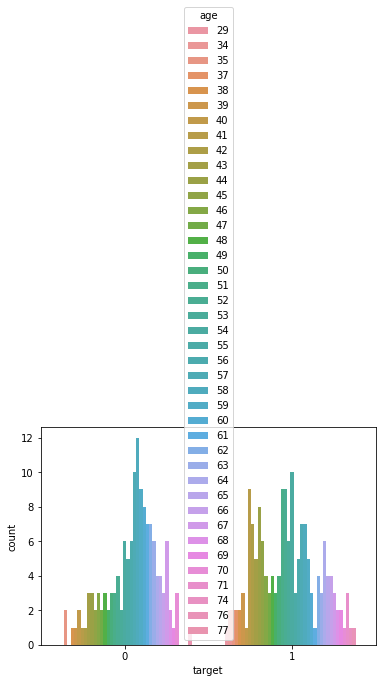

In [80]:
sns.countplot(x='target',hue='age',data=df)

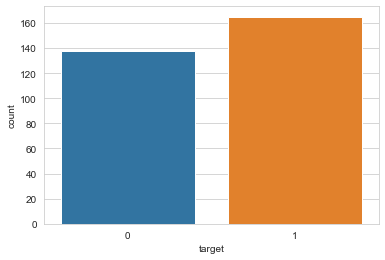

In [81]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df)

In [82]:
pd.value_counts(df['target'])

1    165
0    138
Name: target, dtype: int64

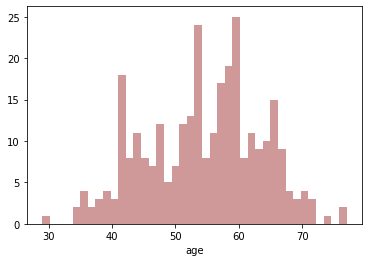

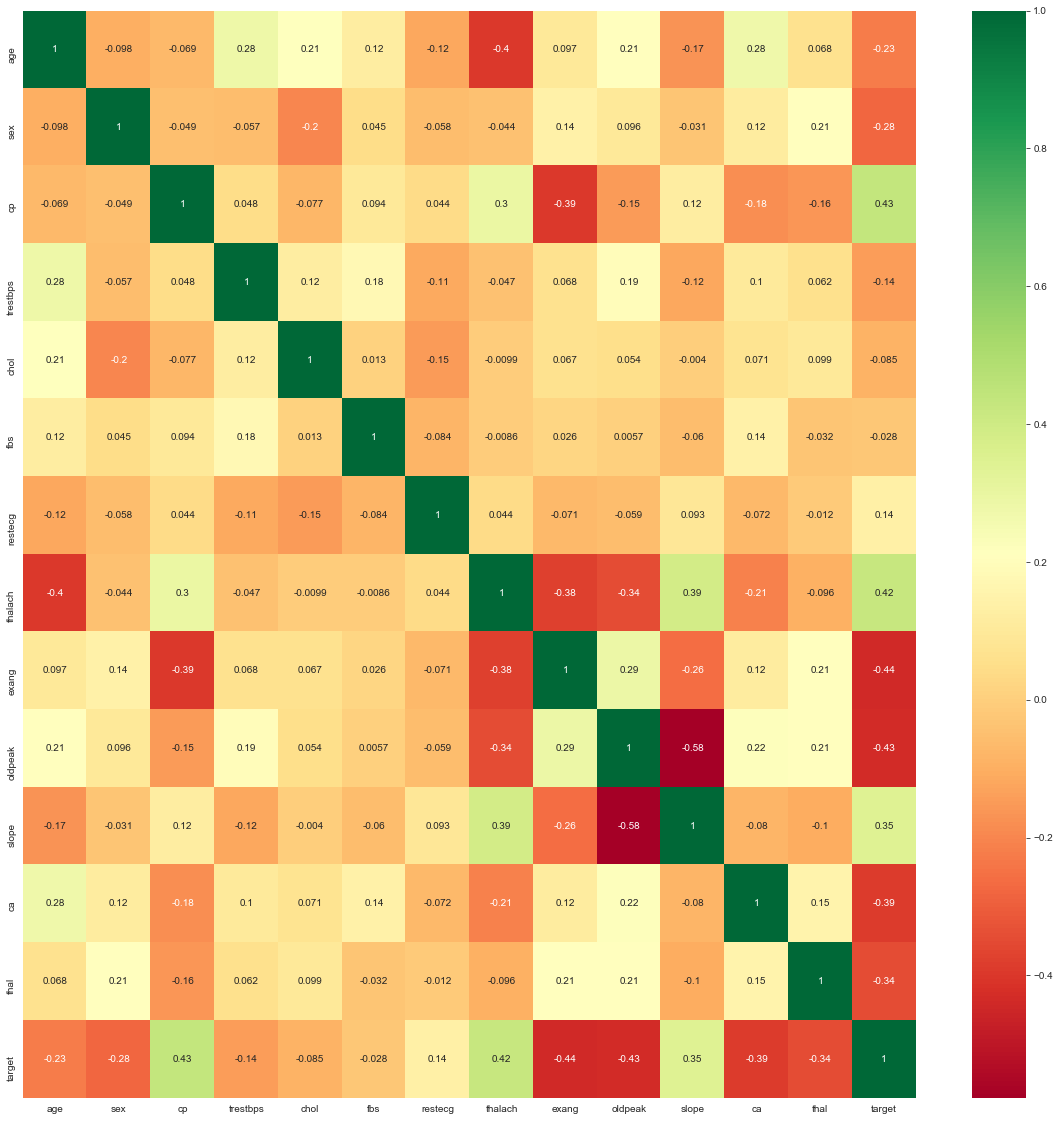

In [83]:
cormat = df.corr()
plt.figure(figsize=(20,20))
cor = cormat.index
sns.heatmap(df[cor].corr(),annot=True,cmap='RdYlGn')

C:\Users\Bhavesh\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000044C2E740F0>,
      dtype=object)

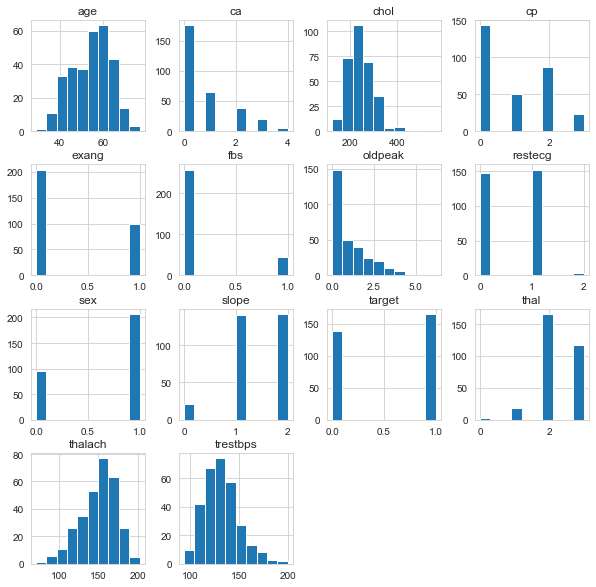

In [84]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df.hist(ax=ax)


In [85]:
dataset = pd.get_dummies(df,columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [86]:
stadscalr  = StandardScaler()

In [87]:
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']

In [88]:
dataset[columns_to_scale] = stadscalr.fit_transform(dataset[columns_to_scale])

In [128]:
dataset.tail(10)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
293,1.393352,1.163746,-0.662169,0.015443,-0.206705,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
294,-1.143291,-0.663867,-1.493165,-0.246940,1.518686,0,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
295,0.952197,0.478391,-1.145306,-0.246940,2.553921,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
296,0.952197,-0.435415,-0.952051,-0.596784,-0.896862,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
297,0.511041,1.849101,-1.357886,-2.608388,-0.034166,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
302,0.290464,-0.092738,-0.198357,1.064975,-0.896862,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [133]:
validation_set = dataset.iloc[0:70,:]
training_set = dataset.iloc[71:303,:]


In [134]:
training_set.shape

(232, 31)

In [90]:
X  = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

#Y = dataset['target']
#X= dataset.drop(['target'],axis=1)

In [144]:
xv =  validation_set.iloc[:,:-1].values
yv =  validation_set.iloc[:,-1].values

In [ ]:
x =  training_set.iloc[:,:-1].values
y =  training_set.iloc[:,-1].values

In [91]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier,X,Y,cv=10)
    knn_scores.append(score.mean())
    

In [92]:
knn_scores

[0.7725806451612902,
 0.7726881720430108,
 0.7923655913978495,
 0.7790322580645161,
 0.7955913978494623,
 0.7825806451612903,
 0.8122580645161289,
 0.8058064516129033,
 0.8090322580645161,
 0.7925806451612903,
 0.7959139784946236,
 0.8056989247311828,
 0.8156989247311828,
 0.8058064516129033,
 0.8056989247311828,
 0.7991397849462365,
 0.7989247311827956,
 0.7891397849462365,
 0.7958064516129031,
 0.7891397849462365]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

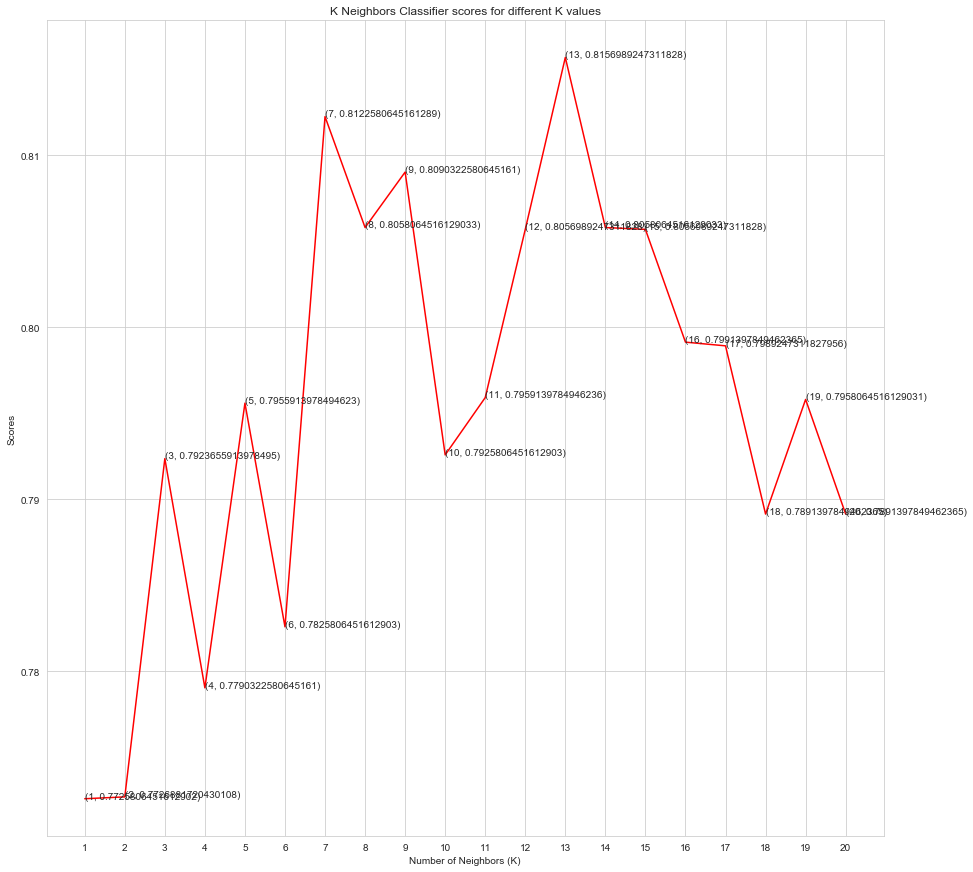

In [93]:
plt.figure(figsize=(15,15))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [94]:
knn_classifier = KNeighborsClassifier(n_neighbors = 13)
#score=cross_val_score(knn_classifier,X,Y,cv=10)

In [95]:
score.mean()

0.8156989247311828

In [97]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0, test_size=0.20)

In [98]:
knn_model = knn_classifier.fit(x_train,y_train)

In [99]:
y_predict= knn_model.predict(x_test)

In [100]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.7868852459016393

0.8032786885245902

### RANDOM FOREST APPROACH

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [161]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

#score=cross_val_score(randomforest_classifier,x,y,cv=10)

In [150]:
score.mean()



0.9362318840579711

In [162]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,random_state=0, test_size=0.20)

In [163]:
random_model = randomforest_classifier.fit(x_train1,y_train1)

In [164]:
y_predict_rand= random_model.predict(x_test1)

In [165]:
accuracy=accuracy_score(y_test1,y_predict_rand)
accuracy

0.9361702127659575

### HYPER PARAMETER TUNING OF RANDOM FOREST

In [167]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [168]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [187]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
randomforest_hyper = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = randomforest_hyper, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [188]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [195]:
randomforest_hyper_after = RandomForestClassifier(n_estimators= 1400,min_samples_split= 2,min_samples_leaf= 1,max_features= 'auto',max_depth= 40,bootstrap= False)

In [207]:
x_trainH,x_testH,y_trainH,y_testH = train_test_split(xv,yv,random_state=0, test_size=0.20)

In [197]:
random_model_hyper = randomforest_hyper_after.fit(x_trainH,y_trainH)

In [198]:
y_predict_rand_hyper= random_model_hyper.predict(x_testH)

In [199]:
accuracy=accuracy_score(y_testH,y_predict_rand_hyper)
accuracy

0.9285714285714286

### GRID SEARCH CV

In [211]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60, 70],
    'max_features': ['sqrt', 'auto'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [600, 800, 1000, 1200]
}

In [212]:
# Create a based model
randomforest_Hyper = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = randomforest_Hyper, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(x, y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 11.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [205]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 600}

In [206]:
randomforest_hyper_after_grid= grid_search.best_estimator_

In [208]:
random_model_hyper = randomforest_hyper_after_grid.fit(x_trainH,y_trainH)

In [209]:
y_predict_rand_hyper= random_model_hyper.predict(x_testH)

In [210]:
accuracy=accuracy_score(y_testH,y_predict_rand_hyper)
accuracy

0.8571428571428571